In [1]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [2]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [3]:
# Define parameters
N=8
lmd = 2
J = 0.5

state_dictionary = {"1100":1, "1010":1, "1001":1, "0101":1, "0011":1}
#state_dictionary = {"1":1}
#state_dictionary = {"0":1}
state_dictionary = {"1":1, "0":1}

ti = 0
tf = np.pi/lmd
Nsteps = 500

In [4]:
initial_state_ST, target_state_ST = md.create_ST_initial_and_target(state_dictionary, N)

In [5]:
# Standard version
H_s = Ham.Hamiltonian(system_size = N,
                    mode = "standard",
                    lambda_factor = lmd, correction = 0
                    )


In [6]:
# Calibrate chain under ideal circumstances
transport_steps, transport_time = dyn.chain_calibration(initial_state_ST, H_s, ti, tf, Nsteps)

In [7]:
# test that algorithm works well without errors
#fidelity, magnetizations = dyn.OneStepAlgorithm(initial_state_ST, target_state_ST, H_s, ti, transport_time, transport_steps, factor = 1.00)
fidelity, magnetizations = dyn.OneStepAlgorithm(initial_state_ST, target_state_ST, H_s, ti, tf, Nsteps, factor = 1.00)


print(max(fidelity))
print(fidelity[-1])

0.5555694542450625
0.5555694542450625


0.9995077358698413
1.24


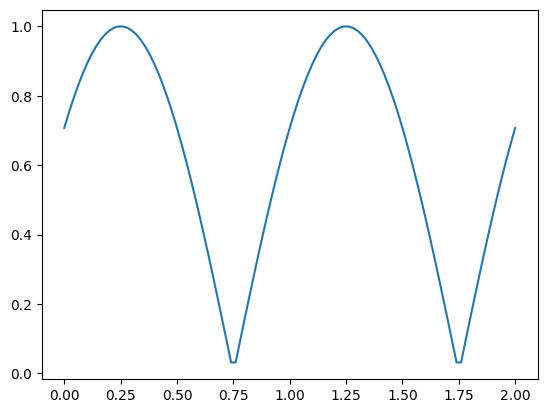

In [34]:
correction_range = np.linspace(0, 2, 101)
fidelities = []
for c in correction_range:
    H_s = Ham.Hamiltonian(system_size = N,
                    mode = "standard",
                    lambda_factor = lmd, correction = c
                    )
    fidelity, magnetizations = dyn.OneStepAlgorithm(initial_state_ST, target_state_ST, H_s, ti, tf, Nsteps, factor = 1.00)
    fidelities.append(fidelity[-1])


plt.plot(correction_range, fidelities)

print(max(fidelities))
print(correction_range[np.argmax(fidelities)])

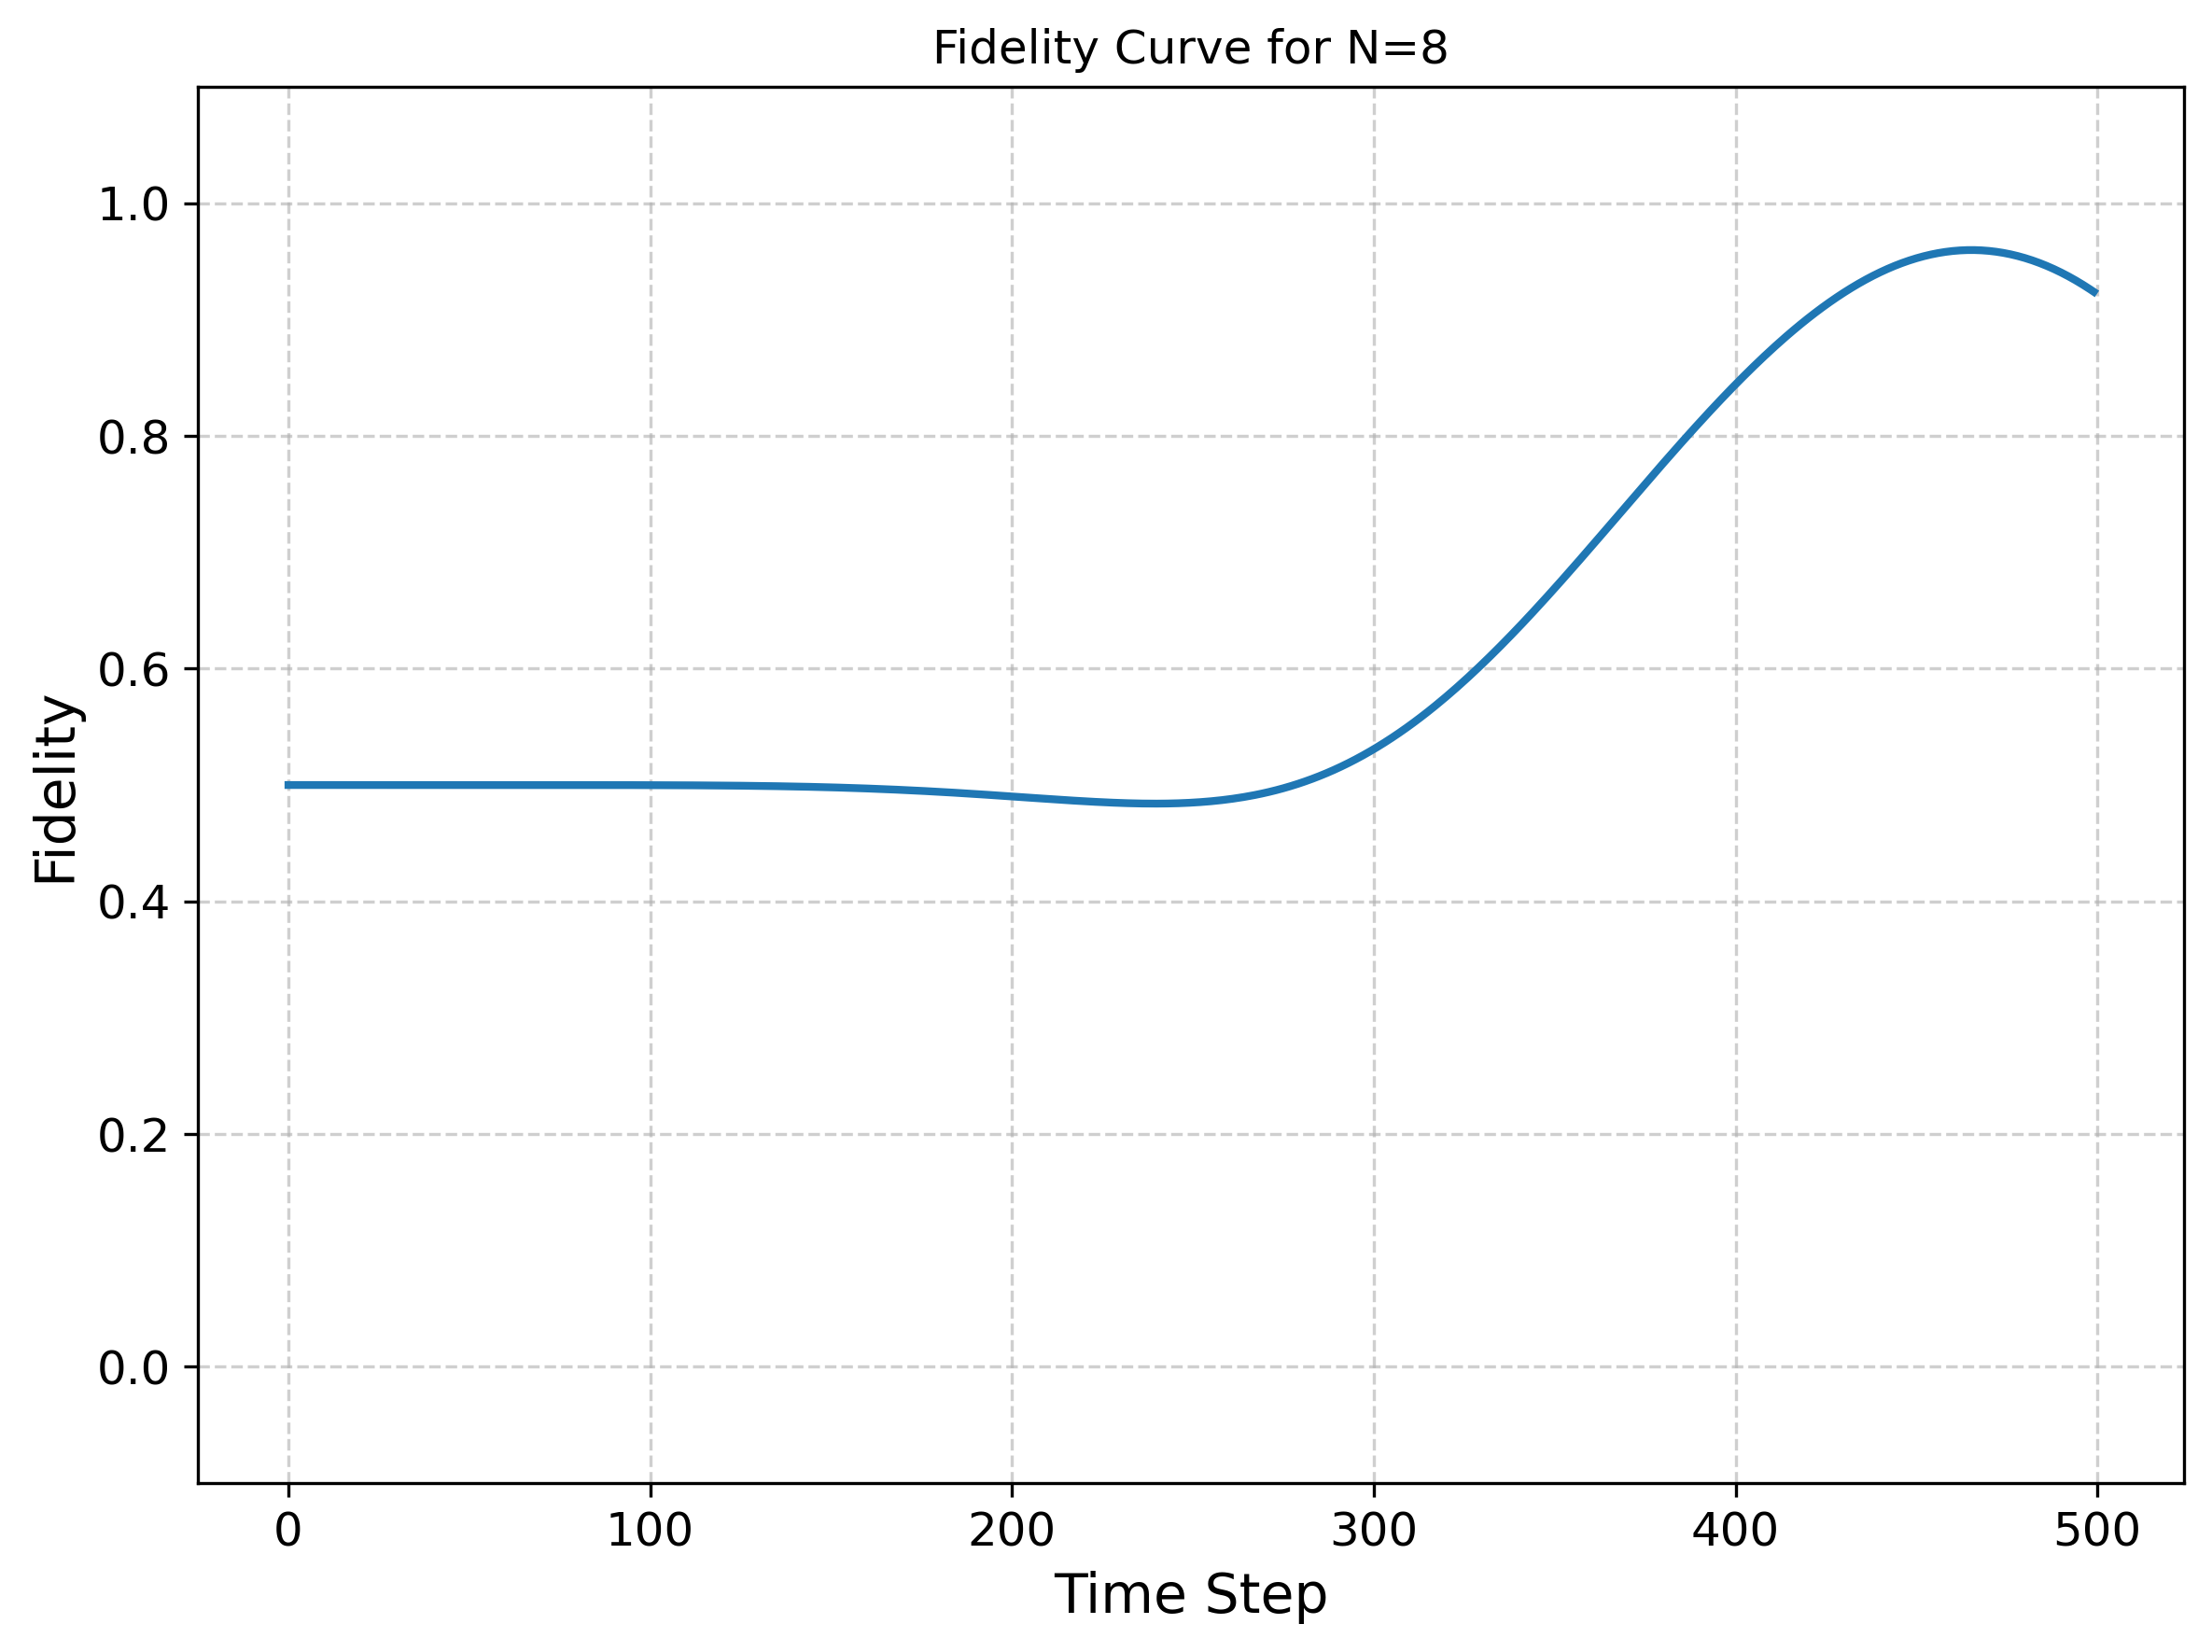

In [18]:
plots.plot_fidelity(fidelity, N)

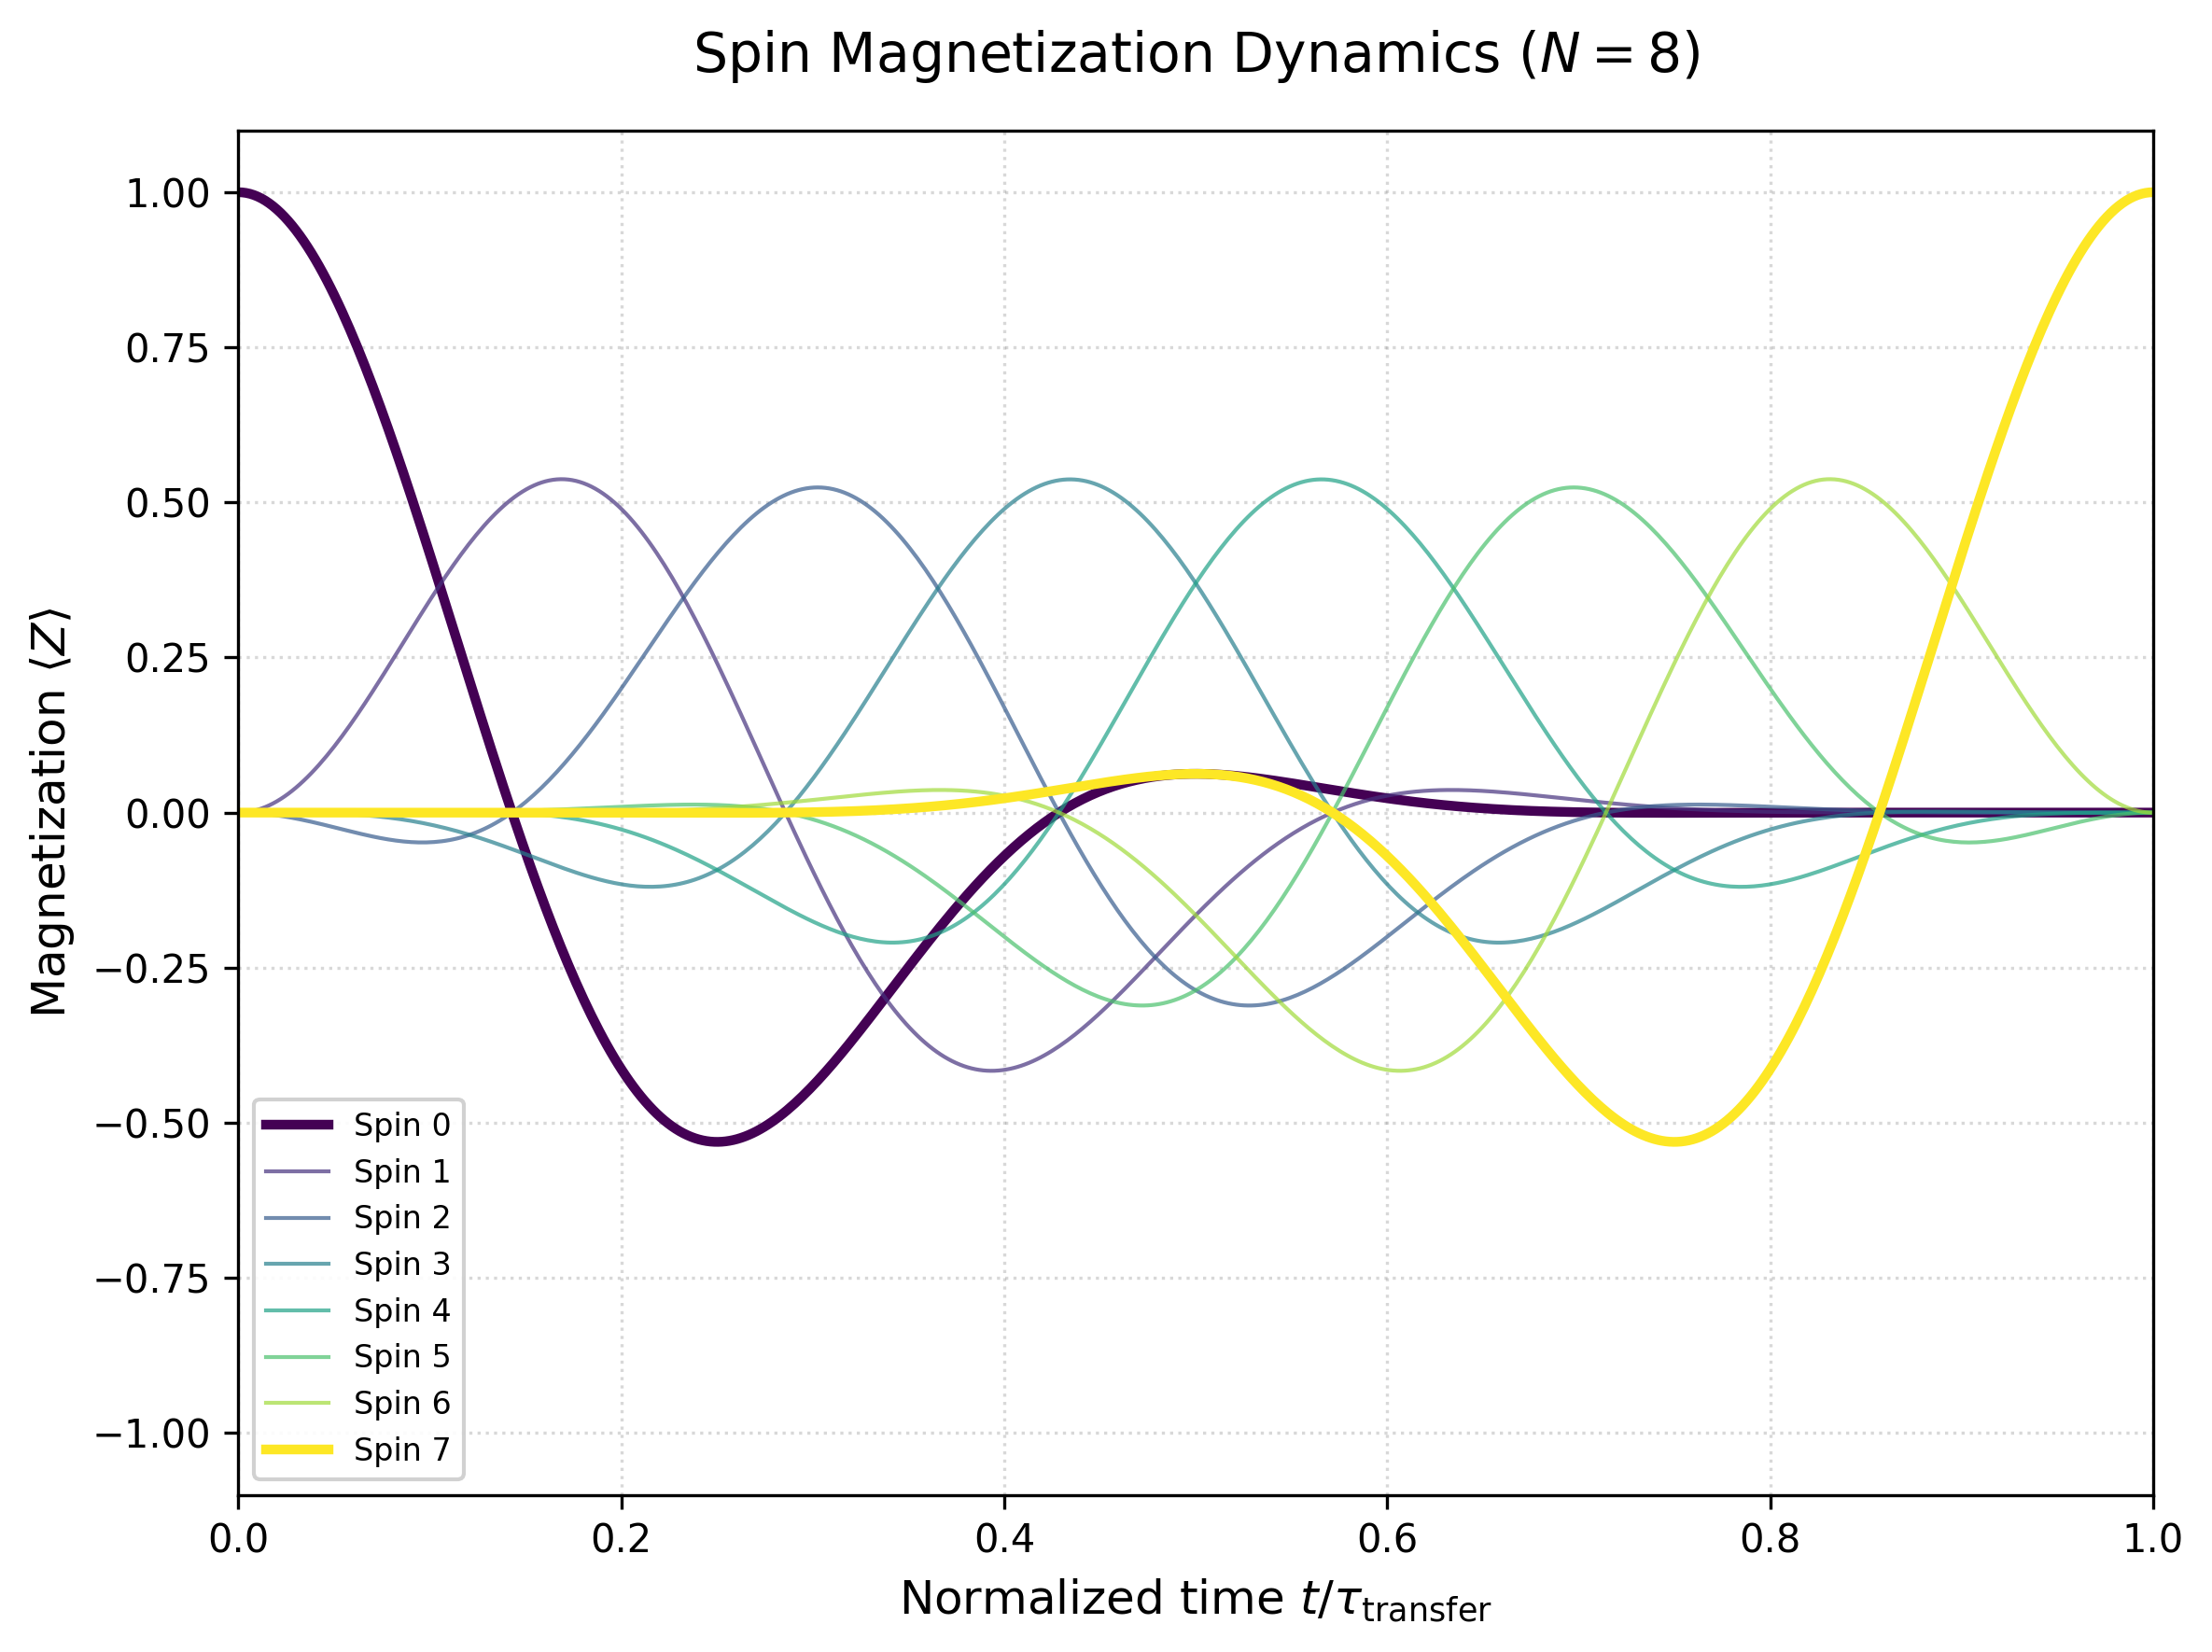

In [9]:
plots.plot_expectations_gradient(magnetizations["Sx"], N)

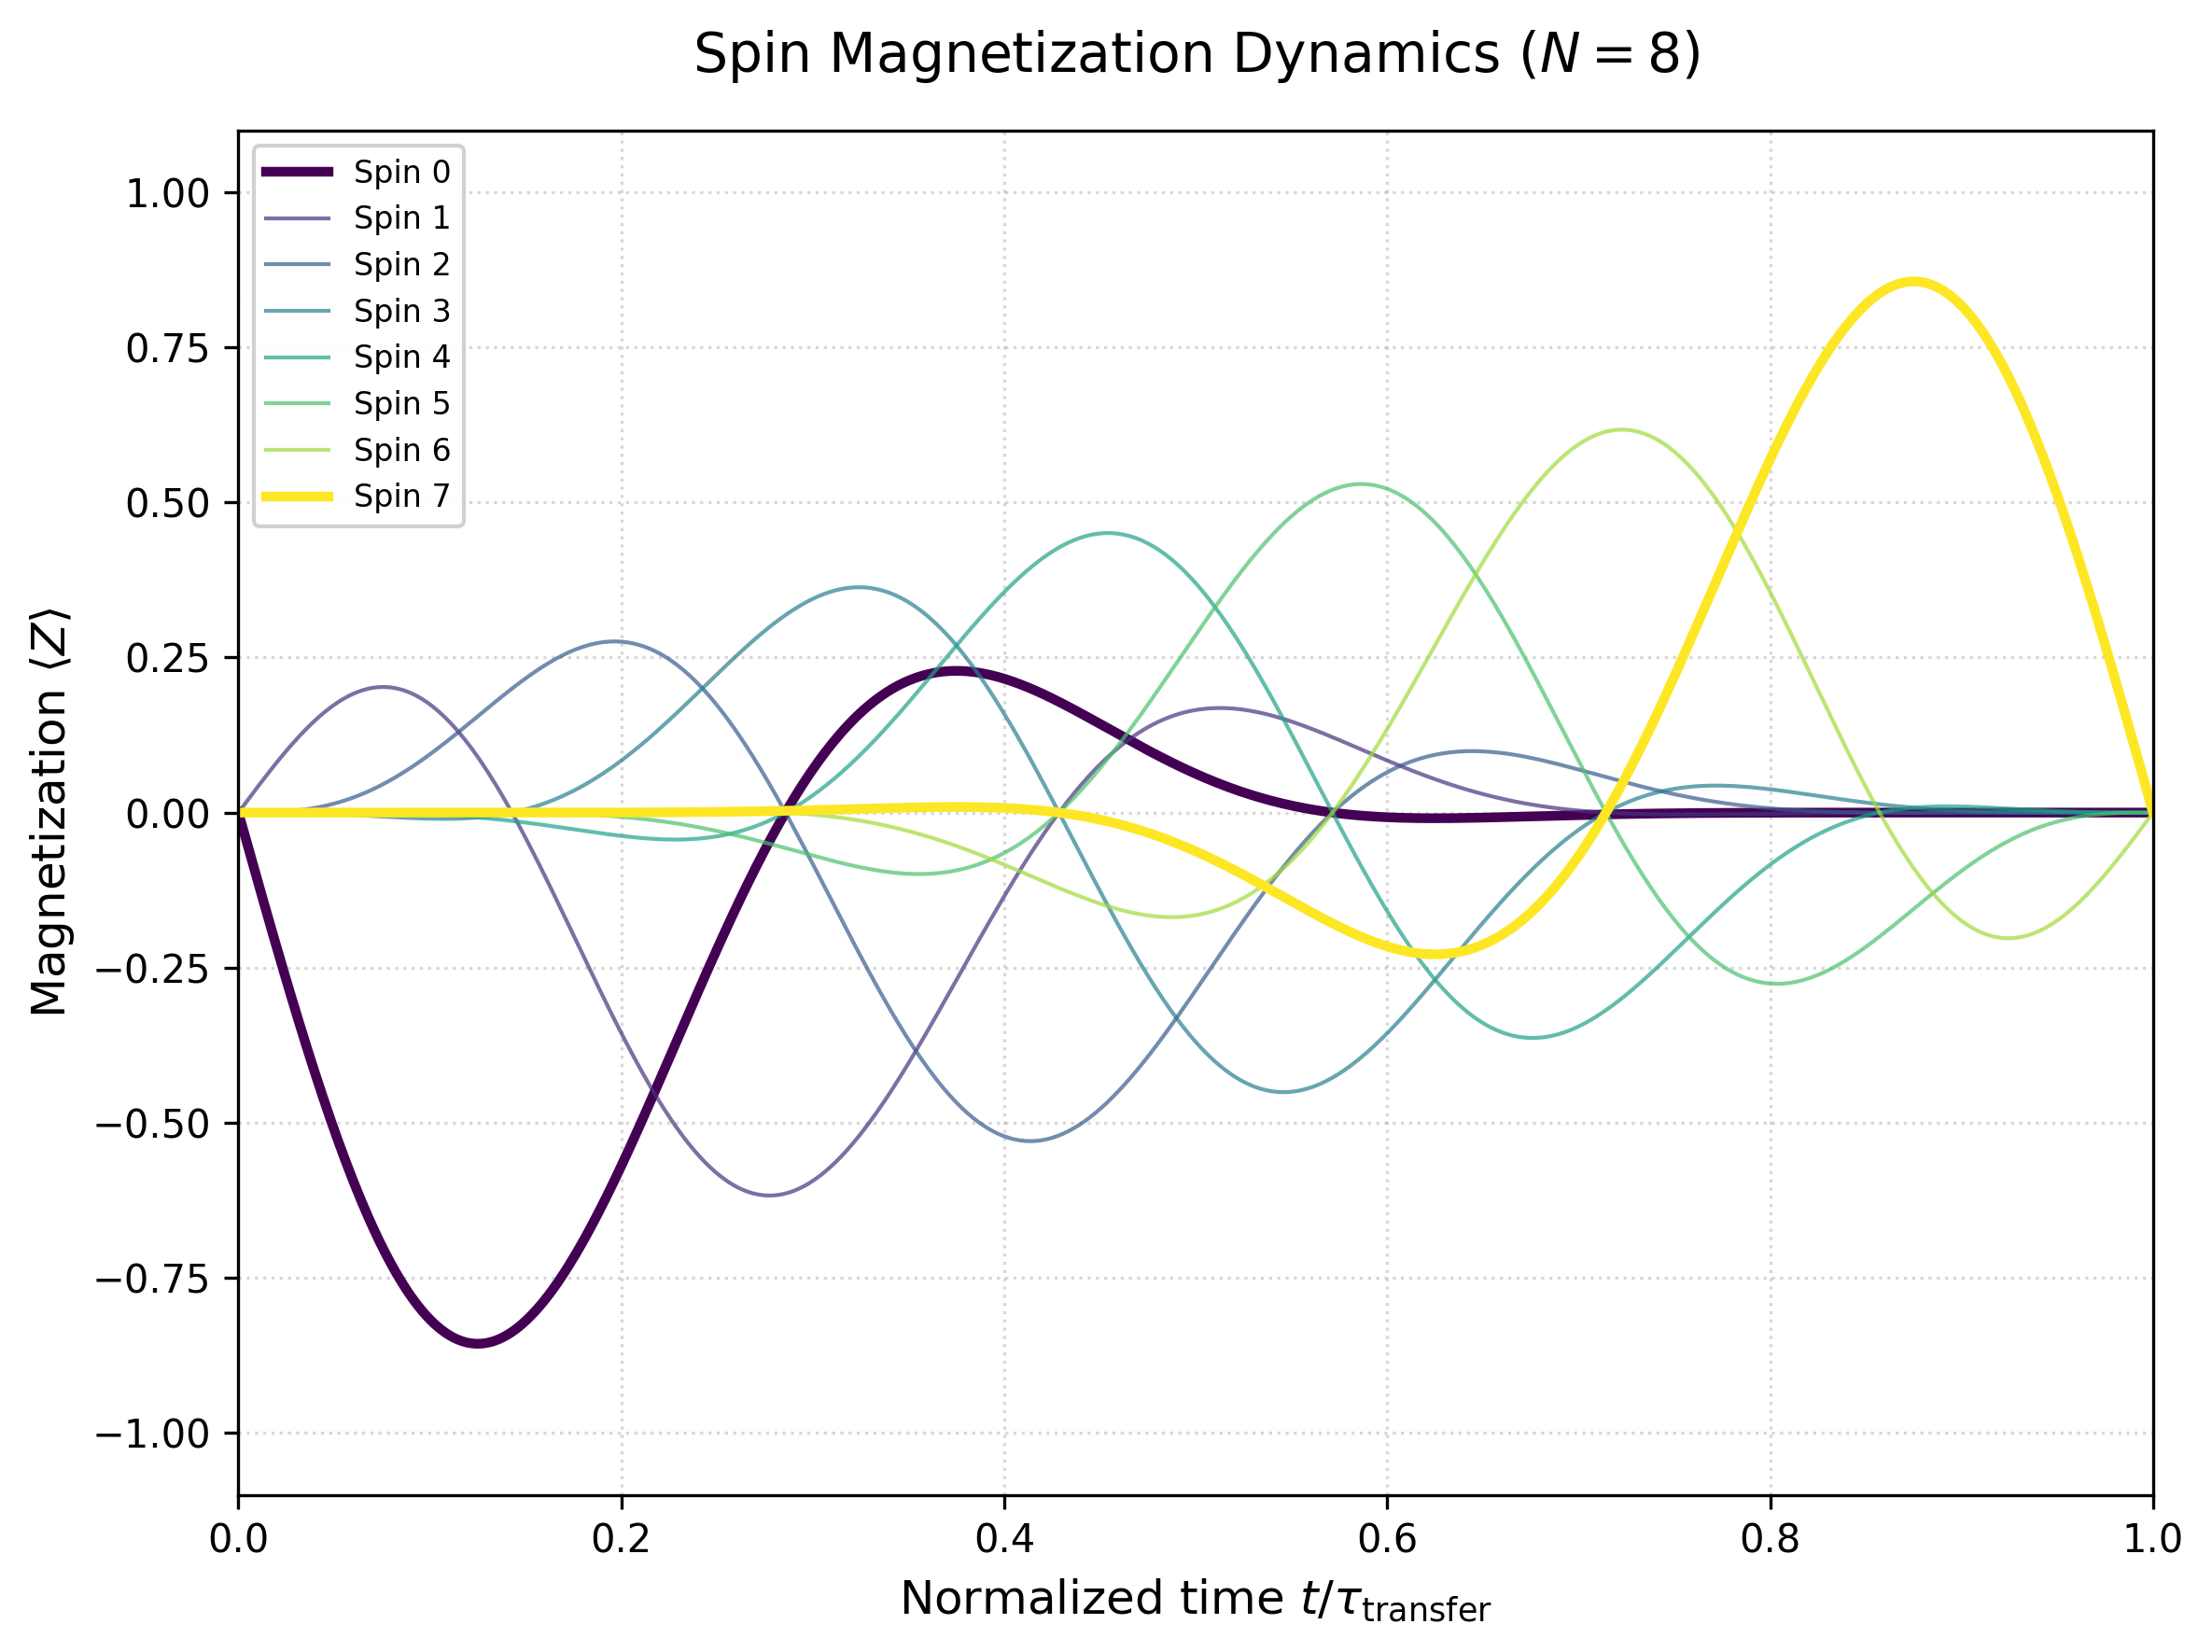

In [10]:
plots.plot_expectations_gradient(magnetizations["Sy"], N)

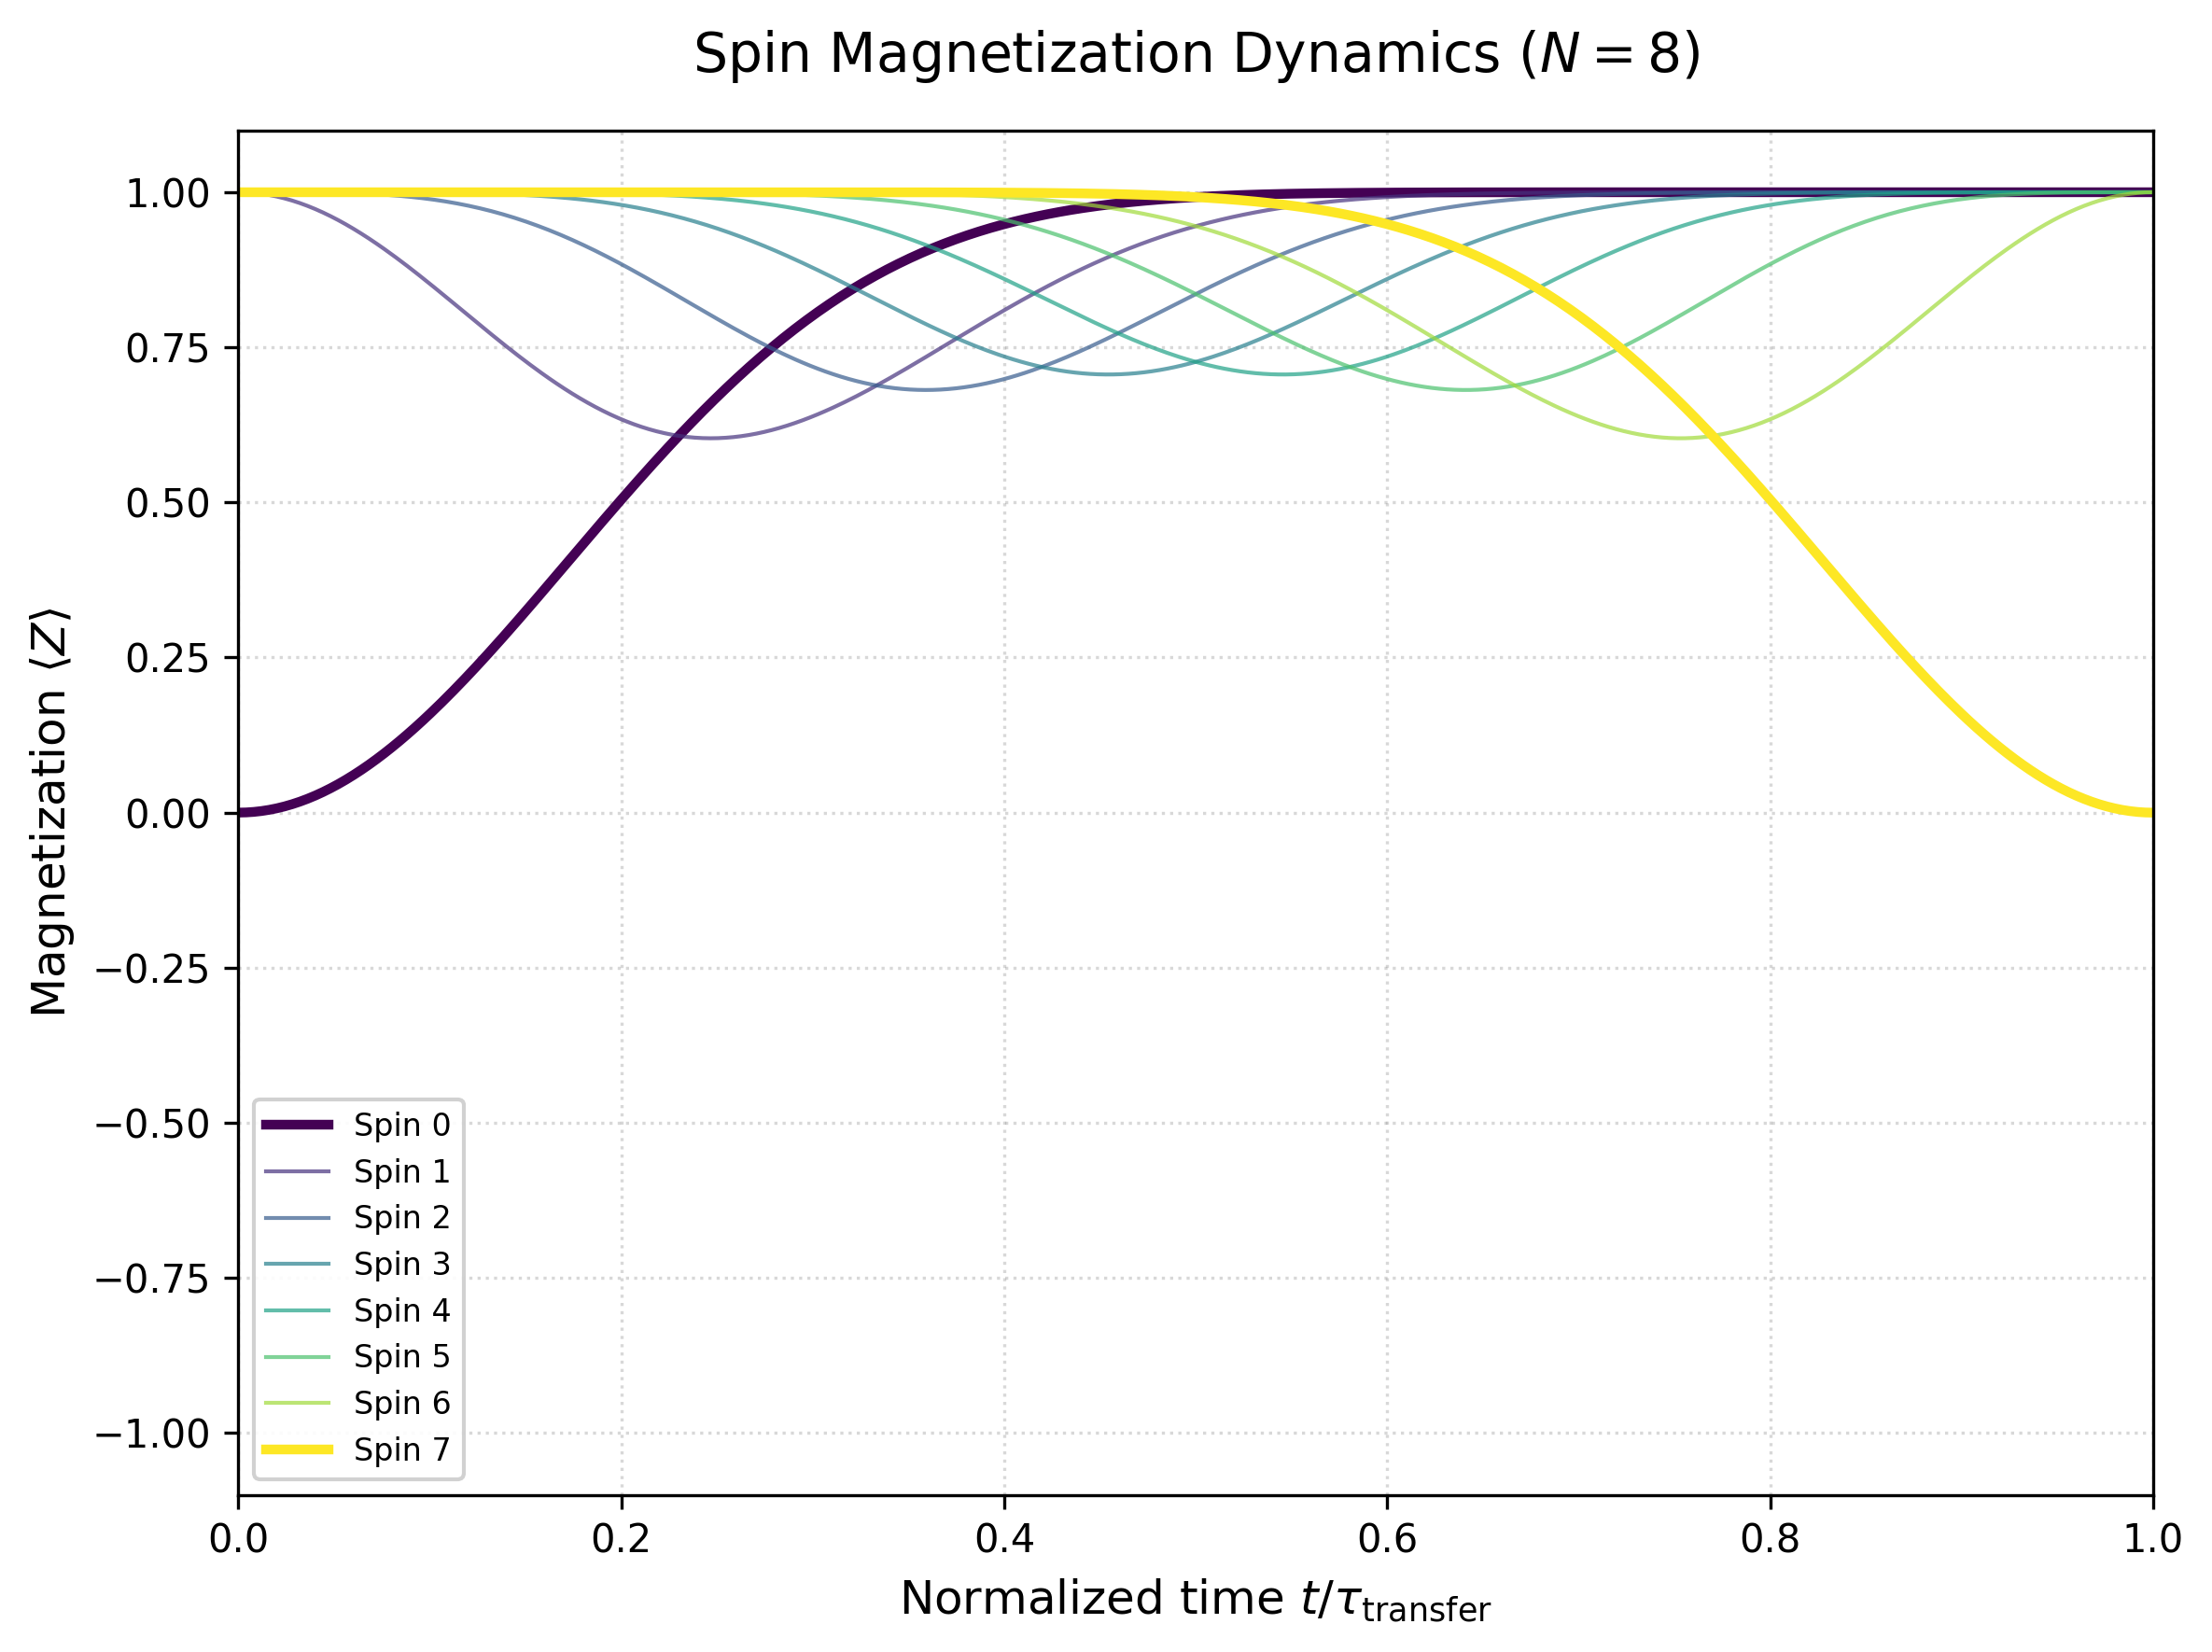

In [38]:
plots.plot_expectations_gradient(magnetizations["Sz"], N)

In [39]:
import pandas as pd

def create_observables_dataframe(state1, state2, H, state1_name="Final", state2_name="Target"):
    """Create a pandas DataFrame for nice tabular output."""
    
    data = []
    obs_dict = {'σx': H.sx_list, 'σy': H.sy_list, 'σz': H.sz_list}
    
    for obs_name, op_list in obs_dict.items():
        for i, op in enumerate(op_list):
            v1 = qt.expect(op, state1)
            v2 = qt.expect(op, state2)
            data.append({
                'Observable': obs_name,
                'Qubit': i,
                state1_name: v1,
                state2_name: v2,
                'Difference': abs(v1 - v2)
            })
    
    df = pd.DataFrame(data)
    return df

# Usage with beautiful printing
df = create_observables_dataframe(result.states[-1], target_state, H)
print(df.to_string(float_format="%.4f", index=False))

NameError: name 'result' is not defined

In [ ]:
magn_end = np.array([qt.expect(op, result.states[-1]) 
                    for op in H.sx_list])
print(magn_end)

magn_target = np.array([qt.expect(op, target_state) 
                    for op in H.sx_list])
print(magn_target)


[-1.01070737e-07  0.00000000e+00 -2.45052203e-06  0.00000000e+00
 -1.16284423e-05  0.00000000e+00 -2.38161438e-05  0.00000000e+00
  2.48716101e-02  0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
